# Part I: Emotion classification
The problem type is supervised multiclass classification and the target is the emotion, with the different classes being ('sadness', 'anger', 'love', 'surprise', 'fear', 'joy').  
To do this we're going to apply transfer learning by using a model pre-trained specifically on this task  
The model is provided by hugging face
https://huggingface.co/mrm8488/t5-base-finetuned-emotion

## 1.1 Prerequisites

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from transformers import AutoTokenizer, AutoModelWithLMHead

## 1.2 Transfer learning

In [2]:
# hugging face tokenizer
tokenizer = AutoTokenizer.from_pretrained("mrm8488/t5-base-finetuned-emotion")
# load the model which is already trained on emotion dataset
model = AutoModelWithLMHead.from_pretrained("mrm8488/t5-base-finetuned-emotion")
# function that takes input and returns emotion
def get_emotion(text):
  input_ids = tokenizer.encode(text + '</s>', return_tensors='pt')

  output = model.generate(input_ids=input_ids,
               max_length=2)
  
  dec = [tokenizer.decode(ids) for ids in output]
  label = dec[0]
  return label
  
#get_emotion("i feel as if i havent blogged in ages are at least truly blogged i am doing an update cute") # Output: 'joy'
 
get_emotion("i have a feeling i kinda lost my best friend") # Output: 'sadness'

c:\Users\Lujai\anaconda3\envs\capstone-proj\lib\site-packages\transformers\models\auto\modeling_auto.py:1177: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


'<pad> sadness'

# Part II: Emoji emotion classification
In this part, we're going to use the previous trained model to help us predict the emotions of the emojis. The feature is the emoji name, e.g., FACE WITH TEARS OF JOY. and the target variable is the emotion.


## 2.1 Read the tweet-emoji dataset

In [3]:
# the problem with this dataset is that it saves the names of the emojis not the emojis themselves # we will solve this by merging it with another dataset
tweets = pd.read_csv("../../../Desktop/tweets_emojis.csv") #problem: some unicode names here don't match unicode names in emoji dataset


In [4]:
# delete uneeded column
tweets.drop('Unnamed: 0', axis=1,inplace=True)

In [5]:
tweets['Unicode name'] = tweets['emoji']
# remove all characters that are not letters or numbers # save it in new column called unicode name to help with merge later
tweets['Unicode name'] = tweets['Unicode name'].str.replace('_', ' ')
# convert to upper case
tweets['Unicode name']= tweets['Unicode name'].apply(lambda names: names.upper())

In [7]:
# drop old column
tweets.drop('emoji', axis=1, inplace=True)

In [6]:
tweets['Unicode name']

0                 FACE WITH TEARS OF JOY
1                 FACE WITH TEARS OF JOY
2                              THUMBS UP
3                 FACE WITH TEARS OF JOY
4                         CLAPPING HANDS
                       ...              
1320030                        MALE SIGN
1320031    BACKHAND INDEX POINTING RIGHT
1320032                     FLUSHED FACE
1320033                 PERSON SHRUGGING
1320034                    RAISING HANDS
Name: Unicode name, Length: 1320035, dtype: object

In [8]:
tweets.head()

,text,Unicode name
0,Idk who taught my baby this BS ️ IGmeetthesa...,FACE WITH TEARS OF JOY
1,Thats me in every lesson,FACE WITH TEARS OF JOY
2,There are MANY of you 🇺 🇸 🇺 🇸 🇮 🇱,THUMBS UP
3,Partner strategy LLRC Urban naxal theories ar...,FACE WITH TEARS OF JOY
4,Happy Birthday More blessings Matsatsi 🏽 Hop...,CLAPPING HANDS


In [9]:
tweets['Unicode name'].value_counts()

FACE WITH TEARS OF JOY            210309
RED HEART                         103172
LOUDLY CRYING FACE                 82659
SMILING FACE WITH HEART-EYES       67817
FIRE                               51030
FEMALE SIGN                        50941
MALE SIGN                          34149
FOLDED HANDS                       32273
WEARY FACE                         30489
TWO HEARTS                         30049
PERSON SHRUGGING                   29903
SMILING FACE WITH SMILING EYES     28519
RAISING HANDS                      26444
THINKING FACE                      26362
PERSON FACEPALMING                 24303
HUNDRED POINTS                     23743
SPARKLES                           23532
FACE WITH ROLLING EYES             21917
CLAPPING HANDS                     21462
ROLLING ON THE FLOOR LAUGHING      21335
FACE BLOWING A KISS                20878
EYES                               20824
THUMBS UP                          19456
BACKHAND INDEX POINTING RIGHT      17971
FLEXED BICEPS   

## 2.2 Read the emoji-unicode dataset

In [10]:
# use this dataset to get the emojis
emojis = pd.read_csv("../data/emojis/Emoji_Sentiment_Data_v1.0.csv")
emojis.head()

,Emoji,Unicode codepoint,Occurrences,Position,Negative,Neutral,Positive,Unicode name,Unicode block
0,😂,0x1f602,14622,0.805101,3614,4163,6845,FACE WITH TEARS OF JOY,Emoticons
1,❤,0x2764,8050,0.746943,355,1334,6361,HEAVY BLACK HEART,Dingbats
2,♥,0x2665,7144,0.753806,252,1942,4950,BLACK HEART SUIT,Miscellaneous Symbols
3,😍,0x1f60d,6359,0.765292,329,1390,4640,SMILING FACE WITH HEART-SHAPED EYES,Emoticons
4,😭,0x1f62d,5526,0.803352,2412,1218,1896,LOUDLY CRYING FACE,Emoticons


In [11]:
# since we dont need all features, only save emoji and name
emojis = emojis[['Emoji', 'Unicode name']]

In [12]:
# after
emojis.head()

,Emoji,Unicode name
0,😂,FACE WITH TEARS OF JOY
1,❤,HEAVY BLACK HEART
2,♥,BLACK HEART SUIT
3,😍,SMILING FACE WITH HEART-SHAPED EYES
4,😭,LOUDLY CRYING FACE


In [13]:
# merge the two dataset on the unicode name to get a tweet - emoji dataset
tweets_emojis = emojis.merge(tweets)
tweets_emojis.head()

,Emoji,Unicode name,text
0,😂,FACE WITH TEARS OF JOY,Idk who taught my baby this BS ️ IGmeetthesa...
1,😂,FACE WITH TEARS OF JOY,Thats me in every lesson
2,😂,FACE WITH TEARS OF JOY,Partner strategy LLRC Urban naxal theories ar...
3,😂,FACE WITH TEARS OF JOY,Dont play with me 🏾 ‍ ️
4,😂,FACE WITH TEARS OF JOY,To the goofiest boy ever who apparently looks ...


In [14]:
tweets_emojis.shape

(741777, 3)

In [15]:
# explore the distribution of emojis
tweets_emojis['Unicode name'].value_counts()

FACE WITH TEARS OF JOY            210309
LOUDLY CRYING FACE                 82659
FIRE                               51030
FEMALE SIGN                        50941
MALE SIGN                          34149
WEARY FACE                         30489
TWO HEARTS                         30049
SMILING FACE WITH SMILING EYES     28519
SPARKLES                           23532
EYES                               20824
FLEXED BICEPS                      16634
PURPLE HEART                       16457
PARTY POPPER                       16259
WINKING FACE                       16075
BLUE HEART                         15941
SMILING FACE WITH SUNGLASSES       15322
SPARKLING HEART                    14614
SKULL                              11976
CRYING FACE                        11265
YELLOW HEART                       10100
FLUSHED FACE                        8449
WHITE HEAVY CHECK MARK              7192
TROPHY                              6892
GLOWING STAR                        6189
HEAVY CHECK MARK

In [16]:
tweets_emojis.duplicated().sum()

0

In [17]:
# since this dataframe is too large, we need a way to query info more efficiently so we create a dictionary
emoji_dict = {k: v for k, v in tweets_emojis.groupby('Unicode name')}

In [18]:
# a dictionary made up of dataframes
emoji_dict

{'BLUE HEART':        Emoji Unicode name                                               text
 462064     💙   BLUE HEART                                  OBF Lets go AMVT 
 462065     💙   BLUE HEART  BEAUTIFUL  ️  ️  ️ RaIna  ️  Unforgettable Mem...
 462066     💙   BLUE HEART                        So much love for youman  ️ 
 462067     💙   BLUE HEART  Idc what my man have or dont have Ima ride w h...
 462068     💙   BLUE HEART  This is JUST the beginning Number 9 on iTunes ...
 ...      ...          ...                                                ...
 478000     💙   BLUE HEART  Thanasi with a convincing win over Alexander B...
 478001     💙   BLUE HEART                      I love you so much hermanita 
 478002     💙   BLUE HEART                    Congrats to the whole family  🏼
 478003     💙   BLUE HEART                          All My Heart also played 
 478004     💙   BLUE HEART    ITS OFFICIAL Arnold Hall Room 153 with my girl 
 
 [15941 rows x 3 columns],
 'CRYING FACE':      

In [19]:
# querying
emoji_dict['HEAVY CHECK MARK']['text']

630503     Mini Giveaway  SATU WINNER GET EXO natrep den...
630504    Q If the items below fall into water which one...
630505    CALLING ALL CoD WWII PLAYERS  is recruiting fo...
630506     ️ The Azerbaijans Best Awarding Ceremony On T...
630507    Interest within reaps in absolute Bliss  ️ Gre...
                                ...                        
636409    I agree As they want 2 disarm us for a reasons...
636410    Gain 150 followers tonight extra FAST  Retweet...
636411    iKONICs  ️ Which team are you on ️  ️ Team Mel...
636412    Fresh squeezed flatforms  ️ Spring forward in the
636413     Check out ALL my gifs of the stunning Kylie Page
Name: text, Length: 5911, dtype: object

## 2.3 Send tweets as input to the pre-trained model


In [ ]:
# classify emoji emotions and save in new emotions column
for key in emoji_dict:
    emoji_dict[key]['Emotions'] = emoji_dict[key]['text'].apply(lambda tweet: get_emotion(tweet.lower()))
    emoji_dict[key].drop(['text', 'Unicode name'], axis=1, inplace=True)

# This takes a while, so instead of having my machine occupied for the number of hours this needs to finish, i broke it down into smaller pieces

In [20]:
# classify emoji emotions and save in new emotions column
emoji_dict['HEAVY CHECK MARK']['Emotions'] = emoji_dict['HEAVY CHECK MARK']['text'].apply(lambda tweet: get_emotion(tweet.lower()))
# drop tweet column
emoji_dict['HEAVY CHECK MARK'].drop(['text', 'Unicode name'], axis=1, inplace=True)

In [22]:
# GLOWING STAR 
emoji_dict['GLOWING STAR']['Emotions'] = emoji_dict['GLOWING STAR']['text'].apply(lambda tweet: get_emotion(tweet.lower()))
emoji_dict['GLOWING STAR'].drop(['text', 'Unicode name'], axis=1, inplace=True)

In [23]:
# TROPHY
emoji_dict['TROPHY']['Emotions'] = emoji_dict['TROPHY']['text'].apply(lambda tweet: get_emotion(tweet.lower()))
emoji_dict['TROPHY'].drop(['text', 'Unicode name'], axis=1, inplace=True)

In [24]:
# WHITE HEAVY CHECK MARK
emoji_dict['WHITE HEAVY CHECK MARK']['Emotions'] = emoji_dict['WHITE HEAVY CHECK MARK']['text'].apply(lambda tweet: get_emotion(tweet.lower()))
emoji_dict['WHITE HEAVY CHECK MARK'].drop(['text', 'Unicode name'], axis=1, inplace=True)

In [25]:
# FLUSHED FACE
emoji_dict['FLUSHED FACE']['Emotions'] = emoji_dict['FLUSHED FACE']['text'].apply(lambda tweet: get_emotion(tweet.lower()))
emoji_dict['FLUSHED FACE'].drop(['text', 'Unicode name'], axis=1, inplace=True)

In [26]:
# YELLOW HEART
emoji_dict['YELLOW HEART']['Emotions'] = emoji_dict['YELLOW HEART']['text'].apply(lambda tweet: get_emotion(tweet.lower()))
emoji_dict['YELLOW HEART'].drop(['text', 'Unicode name'], axis=1, inplace=True)

In [29]:
# CRYING FACE
emoji_dict['CRYING FACE']['Emotions'] = emoji_dict['CRYING FACE']['text'].apply(lambda tweet: get_emotion(tweet.lower()))
emoji_dict['CRYING FACE'].drop(['text', 'Unicode name'], axis=1, inplace=True)

In [30]:
# SKULL
emoji_dict['SKULL']['Emotions'] = emoji_dict['SKULL']['text'].apply(lambda tweet: get_emotion(tweet.lower()))
emoji_dict['SKULL'].drop(['text', 'Unicode name'], axis=1, inplace=True)

In [31]:
# SPARKLING HEART
emoji_dict['SPARKLING HEART']['Emotions'] = emoji_dict['SPARKLING HEART']['text'].apply(lambda tweet: get_emotion(tweet.lower()))
emoji_dict['SPARKLING HEART'].drop(['text', 'Unicode name'], axis=1, inplace=True)

In [32]:
# SMILING FACE WITH SUNGLASSES
emoji_dict['SMILING FACE WITH SUNGLASSES']['Emotions'] = emoji_dict['SMILING FACE WITH SUNGLASSES']['text'].apply(lambda tweet: get_emotion(tweet.lower()))
emoji_dict['SMILING FACE WITH SUNGLASSES'].drop(['text', 'Unicode name'], axis=1, inplace=True)

In [33]:
# BLUE HEART
emoji_dict['BLUE HEART']['Emotions'] = emoji_dict['BLUE HEART']['text'].apply(lambda tweet: get_emotion(tweet.lower()))
emoji_dict['BLUE HEART'].drop(['text', 'Unicode name'], axis=1, inplace=True)

In [34]:
# WINKING FACE
emoji_dict['WINKING FACE']['Emotions'] = emoji_dict['WINKING FACE']['text'].apply(lambda tweet: get_emotion(tweet.lower()))
emoji_dict['WINKING FACE'].drop(['text', 'Unicode name'], axis=1, inplace=True)

In [35]:
# PARTY POPPER
emoji_dict['PARTY POPPER']['Emotions'] = emoji_dict['PARTY POPPER']['text'].apply(lambda tweet: get_emotion(tweet.lower()))
emoji_dict['PARTY POPPER'].drop(['text', 'Unicode name'], axis=1, inplace=True)

In [36]:
# PURPLE HEART
emoji_dict['PURPLE HEART']['Emotions'] = emoji_dict['PURPLE HEART']['text'].apply(lambda tweet: get_emotion(tweet.lower()))
emoji_dict['PURPLE HEART'].drop(['text', 'Unicode name'], axis=1, inplace=True)

In [37]:
# FLEXED BICEPS
emoji_dict['FLEXED BICEPS']['Emotions'] = emoji_dict['FLEXED BICEPS']['text'].apply(lambda tweet: get_emotion(tweet.lower()))
emoji_dict['FLEXED BICEPS'].drop(['text', 'Unicode name'], axis=1, inplace=True)

In [38]:
# EYES
emoji_dict['EYES']['Emotions'] = emoji_dict['EYES']['text'].apply(lambda tweet: get_emotion(tweet.lower()))
emoji_dict['EYES'].drop(['text', 'Unicode name'], axis=1, inplace=True)

In [44]:
# SPARKLES
emoji_dict['SPARKLES']['Emotions'] = emoji_dict['SPARKLES']['text'].apply(lambda tweet: get_emotion(tweet.lower()))
emoji_dict['SPARKLES'].drop(['text', 'Unicode name'], axis=1, inplace=True)

In [45]:
# SMILING FACE WITH SMILING EYES
emoji_dict['SMILING FACE WITH SMILING EYES']['Emotions'] = emoji_dict['SMILING FACE WITH SMILING EYES']['text'].apply(lambda tweet: get_emotion(tweet.lower()))
emoji_dict['SMILING FACE WITH SMILING EYES'].drop(['text', 'Unicode name'], axis=1, inplace=True)

In [46]:
# TWO HEARTS
emoji_dict['TWO HEARTS']['Emotions'] = emoji_dict['TWO HEARTS']['text'].apply(lambda tweet: get_emotion(tweet.lower()))
emoji_dict['TWO HEARTS'].drop(['text', 'Unicode name'], axis=1, inplace=True)

In [47]:
# WEARY FACE
emoji_dict['WEARY FACE']['Emotions'] = emoji_dict['WEARY FACE']['text'].apply(lambda tweet: get_emotion(tweet.lower()))
emoji_dict['WEARY FACE'].drop(['text', 'Unicode name'], axis=1, inplace=True)

In [48]:
# MALE SIGN
emoji_dict['MALE SIGN']['Emotions'] = emoji_dict['MALE SIGN']['text'].apply(lambda tweet: get_emotion(tweet.lower()))
emoji_dict['MALE SIGN'].drop(['text', 'Unicode name'], axis=1, inplace=True)

In [87]:
# FEMALE SIGN 
emoji_dict['FEMALE SIGN']['Emotions'] = emoji_dict['FEMALE SIGN']['text'].apply(lambda tweet: get_emotion(tweet.lower()))
emoji_dict['FEMALE SIGN'].drop(['text', 'Unicode name'], axis=1, inplace=True)

In [88]:
# FIRE
emoji_dict['FIRE']['Emotions'] = emoji_dict['FIRE']['text'].apply(lambda tweet: get_emotion(tweet.lower()))
emoji_dict['FIRE'].drop(['text', 'Unicode name'], axis=1, inplace=True)

In [89]:
# LOUDLY CRYING FACE
emoji_dict['LOUDLY CRYING FACE']['Emotions'] = emoji_dict['LOUDLY CRYING FACE']['text'].apply(lambda tweet: get_emotion(tweet.lower()))
emoji_dict['LOUDLY CRYING FACE'].drop(['text', 'Unicode name'], axis=1, inplace=True)

In [140]:
# FACE WITH TEARS OF JOY
emoji_dict['FACE WITH TEARS OF JOY']['Emotions'] = emoji_dict['FACE WITH TEARS OF JOY']['text'].apply(lambda tweet: get_emotion(tweet.lower()))
emoji_dict['FACE WITH TEARS OF JOY'].drop(['text', 'Unicode name'], axis=1, inplace=True)

----

In [ ]:
# delete extra word present at the start of the string
for key in emoji_dict:    
    emoji_dict[key]['Emotions'] = emoji_dict[key]['Emotions'].apply(lambda tweet: tweet.split(' ', 1)[1])

In [142]:
# save the new dictionary
import csv
with open('../../../Desktop/capstone-data/emoji_emotion_dict.csv', 'w', newline='', encoding="utf-8") as f:
    writer = csv.writer(f)
    for row in emoji_dict.items():
        writer.writerow(row)

------

In [143]:
# merge dictionary dfs into one df
df_list = []
for key in emoji_dict:
    df_list.append(emoji_dict[key])

df_emoji_emotion = pd.concat(df_list)

In [146]:
df_emoji_emotion.Emotions.value_counts() # extra emotions come from transformer model

joy         387824
anger       192890
fear         70514
sadness      57986
love         24011
surprise      8531
gay             10
patience         3
hunger           3
silence          2
divorce          1
wild             1
focus            1
Name: Emotions, dtype: int64

In [145]:
df_emoji_emotion[df_emoji_emotion['Emotions']== 'surprise'] # lots of dups, will be deleted in 2.4

,Emoji,Emotions
462310,💙,surprise
462587,💙,surprise
462590,💙,surprise
462809,💙,surprise
463147,💙,surprise
...,...,...
597441,💛,surprise
597458,💛,surprise
597461,💛,surprise
597559,💛,surprise


In [144]:
# show random 30 rows to check data quality
df_emoji_emotion[['Emotions', 'Emoji']].sample(n=30)

,Emotions,Emoji
543276,joy,🔥
701572,sadness,♀
621975,joy,👀
379657,sadness,😩
4125,joy,😂
363158,sadness,😩
439602,joy,🎉
240510,sadness,😭
311156,anger,😊
664257,joy,♂


In [147]:
# save the dataset as csv
df_emoji_emotion.to_csv('../../../Desktop/capstone-data/emoji_emotion_df.csv', index=False)

## 2.4 Merge emoji and emotion dataset

In [148]:
emotion_df = pd.read_csv("../data/emotions/train.txt", delimiter=';', header=None, names=['Sentence','Emotions'])
emoji_df = pd.read_csv('../../../Desktop/capstone-data/emoji_emotion_df.csv')

In [149]:
# show first 5 rows
emotion_df.head()

,Sentence,Emotions
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [150]:
emotion_df.shape

(16000, 2)

In [151]:
emotion_df.Emotions.value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Emotions, dtype: int64

In [121]:
emoji_df.drop(['Unicode name', 'text'], axis=1, inplace=True)
emoji_df.head()

,Emoji,Emotions
0,💙,fear
1,💙,joy
2,💙,love
3,💙,joy
4,💙,joy


In [152]:
emoji_df.duplicated().sum()

741613

In [153]:
emoji_df = emoji_df.drop_duplicates()

In [154]:
emoji_df.duplicated().sum()

0

In [155]:
# merge the two tables on 'Emotion' column
emotion_emoji_merged = emoji_df.merge(emotion_df)

In [156]:
emotion_emoji_merged.sample(n=20)

,Emoji,Emotions,Sentence
134775,😎,joy,i feel the calm
22577,♂,fear,i generally only post on this site when im fee...
100200,✔,joy,im feeling resolved
92339,🌟,joy,i felt rich being able to insist on paying mor...
133707,😊,joy,i feel invigorated and jolly
319117,😭,sadness,i really feel deprived
145930,💖,joy,i learned in month of us manage to find anothe...
865,💙,fear,i feel like a wimpy blubbering fool right now
299098,💪,sadness,i feel like i missed the singular flight that ...
2463,😢,fear,i am responsible for picking a man who on occa...


In [157]:
emotion_emoji_merged.duplicated().sum()

25

In [158]:
emotion_emoji_merged = emotion_emoji_merged.drop_duplicates()

In [159]:
emotion_emoji_merged.shape

(399975, 3)

In [160]:
emotion_emoji_merged['Emotions'].value_counts()

joy         134025
sadness     116650
anger        53975
fear         48425
love         32600
surprise     14300
Name: Emotions, dtype: int64

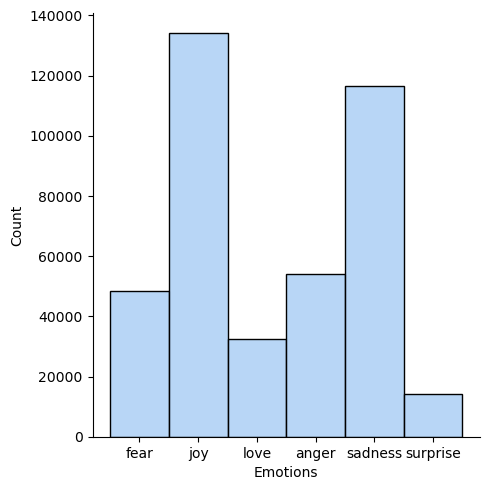

In [161]:
import seaborn as sns
sns.set_palette("pastel")
sns.displot(emotion_emoji_merged, x="Emotions")

In [162]:
# save the dataset as csv
emotion_emoji_merged.to_csv('../../../Desktop/capstone-data/emoji_emotion_merged.csv', index=False)

# Part III: Text emoji recommendation
In this last part, we train a new model to take the text and recommend an emoji based on that text. The predictor is the text and the target variable is the emoji. First we're going to fit a random forest, then try building a deep learning neural network and compare results.

## 3.1 Prerequisites

In [17]:
import numpy as np
import pandas as pd
import nltk
from tkinter import *
from matplotlib import pyplot as plt
import scipy
import re
from nltk.corpus import stopwords
from tensorflow.python import keras
import string
from keras.layers import Dense, Activation, Input, Dropout, SimpleRNN, LSTM
from keras.models import Model, Sequential
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
#from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, MinMaxScaler
from sklearn.metrics import confusion_matrix
from sentence_transformers import SentenceTransformer
from scipy.spatial import distance
from sklearn.metrics import mean_squared_error


## 3.2 Text preprocessing

In [3]:
# read dataset
emotion_emoji_merged = pd.read_csv('../../../Desktop/capstone-data/emoji_emotion_merged.csv')

In [6]:
emotion_emoji_merged.sample(n=20)

,Emoji,Emotions,Sentence
33905,✨,fear,i feel very distressed because i m supportive ...
289472,♀,sadness,i wondered if i would feel a bit lost when i g...
161948,😩,joy,i do do what i do it always feels worthwhile a...
30555,😊,fear,i feel really nervous about losing it i print ...
155889,💕,joy,i woke up feeling incredibly content amp optim...
159681,💕,joy,i feel tranquil now
142113,✨,joy,i and fans cheering for penn state made me fee...
163582,😩,joy,i leave feeling challenged and eager to study ...
32189,😎,fear,i never want to diminish the pain ocd has plac...
273946,😢,sadness,i feel like even though i dont buy into societ...


In [8]:
# split the data
X = emotion_emoji_merged['Sentence']
y = emotion_emoji_merged['Emoji']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, y_train.shape)

(267983,) (267983,)


In [9]:
# take a random sample from the data due to  memory issues
X_train = X_train.sample(n=1000, random_state=1)
X_test = X_test.sample(n=1000, random_state=1)
y_train = y_train.sample(n=1000, random_state=1)
y_test = y_test.sample(n=1000, random_state=1)

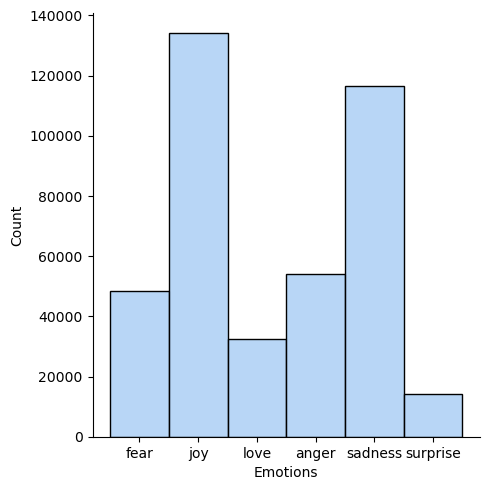

In [6]:
sns.set_palette("pastel")
sns.displot(emotion_emoji_merged, x="Emotions")

### 3.2.1 Embeddings
First method of embedding caused memory issues so we're going to try different methods

In [7]:
# create an embedding matrix using golve vectors from pre-trained models
file = open("../../../Desktop/glove.6B/glove.6B.50d.txt", encoding = 'utf8')


In [8]:
# function that creates a dictionary where the key is the word and the values are all the embeddings
# the dictionary that will hold the mappings between words, and the embedding vectors of those words
def intialize_emb_matrix(file):
    embedding_matrix = {}
    for line in file:
        values = line.split()
        word = values[0]
        embedding = np.array(values[1:], dtype='float64')
        embedding_matrix[word] = embedding

    return embedding_matrix 
embedding_matrix = intialize_emb_matrix(file)

In [9]:
# This is the vector of the word’s position
embedding_matrix['ok']

array([-0.53646 , -0.072432,  0.24182 ,  0.099021,  0.18426 , -0.86764 ,
        0.081939,  0.40473 , -0.40506 ,  0.47446 , -0.16865 ,  0.38936 ,
       -0.16916 ,  0.1661  ,  0.73543 ,  0.83612 ,  0.026771,  0.56956 ,
        0.41988 , -0.23297 , -0.58841 ,  0.5495  ,  0.71645 ,  0.22451 ,
        1.0043  , -1.5036  , -0.78521 ,  0.73364 ,  0.4161  , -1.6782  ,
        1.9156  ,  0.26593 , -0.41546 ,  0.97965 , -0.06039 , -0.74422 ,
        0.6166  , -0.023109,  0.77383 , -0.65267 , -0.20022 , -0.2479  ,
        0.04704 ,  0.31407 ,  0.32598 , -0.24481 ,  0.16835 ,  0.097793,
        0.12392 ,  1.1584  ])

In [26]:
# embedding our text dataset
# note: we shouldn't remove stop words before embedding 
# because that would remove semantic structure 
# that we need for our model to work well
embedding_data_1 = np.zeros((len(X_train), 168, 50))
def get_emb_data(data, max_len):
    #embedding_data = np.zeros((len(data), max_len, 50))  # from glove6B50d
    
    for idx in range(data.shape[0]):
        words_in_sentence = data[idx].split()
        
        for i in range(len(words_in_sentence)):
            if embedding_matrix.get(words_in_sentence[i].lower()) is not None:
                embedding_data_1[idx][i] = embedding_matrix[words_in_sentence[i].lower()]
                
    return embedding_data_1

In [175]:
# check embeddings, use euclidean distance
def find_closest_embeddings(embedding):
    return sorted(embedding_matrix.keys(), key=lambda word: distance.euclidean(embedding_matrix[word], embedding))


In [176]:
print(find_closest_embeddings(embedding_matrix["paper"])[1:6])

['print', 'sheet', 'printed', 'printing', 'ink']


In [ ]:
# get embedding for train daata
X_train_emb = get_emb_data(X_train, 168)
# training data after embedding
X_train_emb
# get embedding for test data
X_test_emb = get_emb_data(X_test, 168)

### 2.3.2 Multi Label Binarizer Embedding

In [93]:
# 
mlb = MultiLabelBinarizer()
X_train_encoded = pd.DataFrame(mlb.fit_transform([x.split(', ') for x in X_train]),columns=mlb.classes_)
X_test_encoded = pd.DataFrame(mlb.fit_transform([x.split(', ') for x in X_test]),columns=mlb.classes_)

### 2.3.3 sentence BERT Embedding
state of the art

In [10]:
# using transformers we're going to load bert's tokenizer to embed our text
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

In [11]:
# fit on x_train
sentence_embeddings = sbert_model.encode(X_train.values)

In [113]:
print('Sample BERT embedding vector - length', len(sentence_embeddings[0]))
print('Sample BERT embedding vector - note includes negative values', sentence_embeddings[0])

Sample BERT embedding vector - length 768
Sample BERT embedding vector - note includes negative values [-1.11406427e-02  7.82619536e-01  2.29225397e+00 -5.13707280e-01
 -3.74891832e-02 -3.97220969e-01  1.00704640e-01 -3.38514775e-01
  2.30654716e-01 -9.16336894e-01  4.73456889e-01  1.60204124e+00
  2.98290253e-01  3.43936324e-01 -4.98798698e-01  6.06399596e-01
 -4.92154866e-01 -6.03944845e-02  5.24575880e-04 -4.31536019e-01
 -1.32808357e-01 -4.89682496e-01 -2.23055631e-01  2.75670916e-01
  6.41918719e-01  7.51115501e-01  3.71280760e-02  4.10377860e-01
  4.03954566e-01  3.43511552e-01  2.50652842e-02  6.80952311e-01
  5.65396585e-02 -3.31073254e-01  1.21781975e-01  5.96594572e-01
  5.40222108e-01  6.96665406e-01  1.47329435e-01 -2.29534775e-01
  3.96832317e-01 -4.28413987e-01  6.25119746e-01 -2.14029282e-01
 -8.75452995e-01 -8.64977241e-01 -1.33740783e+00  8.33364367e-01
  1.41965702e-01 -1.77410021e-01 -1.37074128e-01 -3.58242020e-02
 -8.81657064e-01 -7.96701163e-02 -1.04216659e+00  8.

### test the encoder

In [115]:
# create a test sentence
test_sent = "I hope this model works"
test_sent_vec = sbert_model.encode([test_sent])[0]

In [116]:
# compute the cosine similarity between the test vector and our training vectors
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))
  
for sent in X_train.values:
  sim = cosine(test_sent_vec, sbert_model.encode([sent])[0])
  print("Sentence = ", sent, "; similarity = ", sim)

Sentence =  i keep the four visual design principles contrast repetition alignment and proximity in mind i feel i will be successful in future design projects ; similarity =  0.54975975
Sentence =  i was a tad more jaded stopping the booth rep from reciting his memorized spiel by mentioning that i had been following the unit for a year but came away feeling pretty impressed ; similarity =  0.24600779
Sentence =  i feel tender cool and relax after enjoying these wonderful masters ; similarity =  0.5837912
Sentence =  i wake up hobble over to the computer or turn over and grab the phone from the night stand and start checking emails blogs facebook random internet clicking writing a few posts and before i know it its nearly noon and i feel no more productive than i did three hours earlier ; similarity =  -0.0557874
Sentence =  i was feeling a bit jaded combination of mixed up feelings not enough sleep and too many big screen presentations i think ; similarity =  0.16653179
Sentence =  i m

### 3.2.2 Encoding the target variable

In [12]:
# initialize decoder
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
# use a decoder to get original data
dicoder = dict(zip(lb.classes_, lb.transform(lb.classes_)))


In [82]:
dicoder

{'♀': 0,
 '♂': 1,
 '✅': 2,
 '✔': 3,
 '✨': 4,
 '🌟': 5,
 '🎉': 6,
 '🏆': 7,
 '👀': 8,
 '💀': 9,
 '💕': 10,
 '💖': 11,
 '💙': 12,
 '💛': 13,
 '💜': 14,
 '💪': 15,
 '🔥': 16,
 '😂': 17,
 '😉': 18,
 '😊': 19,
 '😎': 20,
 '😢': 21,
 '😩': 22,
 '😭': 23,
 '😳': 24}

In [150]:
#return key at value 0
#dicoder
list(dicoder.keys())[list(dicoder.values()).index(0)]

'♀'

## 3.3 Random Forest

### 3.3.1 Model building

In [138]:
# create the model
RFmodel = RandomForestClassifier(n_estimators =400,criterion="entropy",random_state =0)
# fit the model
RFmodel.fit(sentence_embeddings,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=400, random_state=0)

### 3.3.2 Model testing

In [13]:
X_test_embedded = sbert_model.encode(X_test.values)

In [191]:
RF_y_pred = RFmodel.predict(X_test_embedded)
RF_y_pred

20

In [219]:
def RF_model(text_input):
    embedded_input = sbert_model.encode([text_input])[0] #return numpy array of vectors
    embedded_input = np.expand_dims(embedded_input, 0) # reshape from (768,) to (1,768)
    RF_y_pred = RFmodel.predict(embedded_input)# error
    #output = np.argmax(RF_y_pred) # returns a single number which should map to an emoji
    for i in RF_y_pred:
        a = list(dicoder.keys())[list(dicoder.values()).index(i)]
    return a
    # list(dicoder.keys())[list(dicoder.values()).index(output)]
    

In [222]:
print(RF_model("i hope this model works!"))

✅


### 3.3.3 Plot accuracy

C:\Users\Lujai\AppData\Local\Temp\ipykernel_28296\709481204.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Values")
C:\Users\Lujai\AppData\Local\Temp\ipykernel_28296\709481204.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

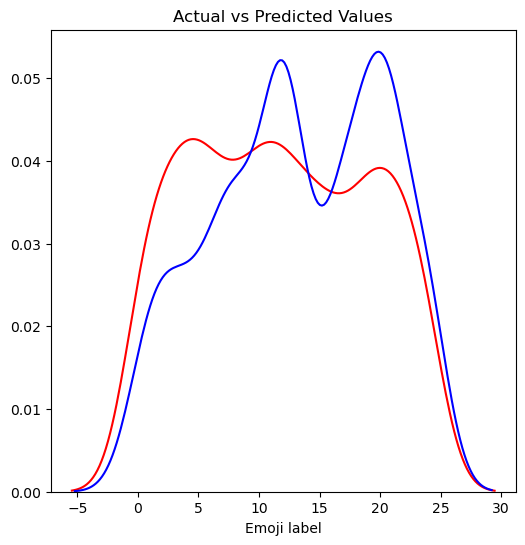

In [141]:
#
plt.figure(figsize=(6, 6))

# use displot for newer versions
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Values")
sns.distplot(RF_y_pred, hist=False, color="b", label="Predicted Values" , ax=ax1)


plt.title('Actual vs Predicted Values')
plt.xlabel('Emoji label')
plt.ylabel('')

plt.show()
plt.close()

### 3.3.4 Accuracy

In [15]:
import os
import pickle
abspath = os.path.abspath("RF_model.pickle")
f = open(abspath, 'rb')
RFmodel = pickle.load(f)
f.close()

In [20]:
import math
mse = mean_squared_error(y_test, RF_y_pred)
rmse = math.sqrt(mse)
print('Accuracy for Random Forest',100*max(0,rmse)) 

Accuracy for Random Forest 1016.7300526688488


## Save the mdodel

In [155]:
import pickle
f = open('RF_model.pickle', 'wb')
pickle.dump(RFmodel, f)
f.close()

## 3.4 LSTM

In [95]:
# converting y_train to one hot vectors so that cross-entropy loss can be used
y_train = to_categorical(y_train)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [96]:
y_test = to_categorical(y_test)
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### 3.4.1 Model building

In [121]:
model = Sequential()

In [122]:
# try different dropouts
model.add(LSTM(units = 256, return_sequences=True, input_shape = (1000, 768)))
model.add(Dropout(0.3))
model.add(LSTM(units=128))
model.add(Dropout(0.3))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=20, activation='softmax'))

In [123]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 1000, 256)         1049600   
                                                                 
 dropout_4 (Dropout)         (None, 1000, 256)         0         
                                                                 
 lstm_5 (LSTM)               (None, 128)               197120    
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 32)               

In [124]:
# try different optimizers
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['acc'])

### 3.4.2 Model training

In [ ]:
# try different validation split
# try different epochs
res = model.fit(sentence_embeddings, y_train, validation_split=0.2, batch_size=32, epochs=50, verbose=2)

### 3.4.3 Model performance overview

In [ ]:
# Loss and accuracy plots

### 3.4.4 Confusion matrix and correlation report